### INSTRUCTIONS FOR THE ASSIGNMENT
All you need to submit for this project is two links - one for your GitHub repo and one for your blog post. Your GitHub repo should contain your code, dataset, and README.md files.

Choose A Dataset of Your Own
You are welcome to use Kaggle or another platform (or your own data) to create a blog and Github post instead of using the datasets discussed above.

Key Steps for Project
Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:

Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize

Provide a clear connection between your business questions and how the data answers them.
4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience

In [97]:
# ALL IMPORTS GO HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import fbeta_score, accuracy_score from scikit
from sklearn.metrics import fbeta_score, accuracy_score

# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [46]:
###### IMPORT DATA SETS & GATHER DATA

# The dataset contains 2 files: deliveries.csv and matches.csv.
# matches.csv contains details related to the match such as location, contesting teams, umpires, results, etc.
# deliveries.csv is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

#Acknowledgements
#Source: http://cricsheet.org/ (data is available on this website in the YAML format. This is converted to CSV format by the contributors)

df_1 = pd.read_csv('matches.csv')
df_2 = pd.read_csv('deliveries.csv')

In [47]:
# ANALYZE DATA
df_1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [48]:
df_1.shape[0]

696

In [49]:
# RUN DESCRIBE TO GET BASIC STATS
df_2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [50]:
df_2.shape[0]

164750

In [51]:
# VIEW FEW RECORDS TO UNDERSTAND THE DATA AND CHECK FOR MISSING VALUES
df_1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [52]:
# VIEW FEW RECORDS TO UNDERSTAND THE DATA AND CHECK FOR MISSING VALUES
df_2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [53]:
# HANDLE CATEGORICAL AND MISSING DATA IF ANY
# Removing Umpire 3 column as most of the values are empty
#df_1.drop(['umpire3'],axis=1,inplace=True)

# There are quite a few NaN values, let us update them to zeroes
df_1.fillna(0, inplace=True)


In [54]:
df_1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,08/04/2017,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


In [55]:
# Total Venues where the matches have been held
Cities = df_1['city'].nunique()
print("IPL Matches are played so far across {} cities".format(Cities))

Venues = df_1['venue'].nunique()
print("IPL Matches are played so far across {} venues".format(Venues))

IPL Matches are played so far across 33 cities
IPL Matches are played so far across 35 venues


In [56]:

print(((df_1['winner']).value_counts()).idxmax(),': has the highest number of match wins')
print(((df_1['toss_winner']).value_counts()).idxmax(),': has won the most number of tosses')


Mumbai Indians : has the highest number of match wins
Mumbai Indians : has won the most number of tosses


In [57]:
# IPL Winners Each Year
print('IPL Winner Each Year')
for i in range(2008,2019):
    df=((df_1[df_1['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

IPL Winner Each Year
[2008 'Rajasthan Royals']
[2009 'Deccan Chargers']
[2010 'Chennai Super Kings']
[2011 'Chennai Super Kings']
[2012 'Kolkata Knight Riders']
[2013 'Mumbai Indians']
[2014 'Kolkata Knight Riders']
[2015 'Mumbai Indians']
[2016 'Sunrisers Hyderabad']
[2017 'Mumbai Indians']
[2018 'Chennai Super Kings']


In [58]:
# Different ways of dismissals
df_2.fillna(0, inplace=True)
df_2.head()

#print((((df_2['dismissal_kind'] != 0)).value_counts()).idxmax(),': is the most frequent way of dismissal')


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,0,0,0


In [59]:
# REPLACING DISMISSAL KINDS FROM STRINGS TO INTEGERS FOR CALCULATIONS
df_2['dismissal_kind'].replace(['bowled','caught','caught and bowled', 
                                'hit wicket', 'lbw', 'obstructing the field', 
                                'retired hurt', 'run out','stumped'],
                               [1,2,3,4,5,6,7,8,9], inplace=True)

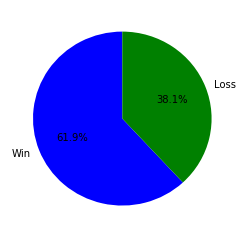

In [60]:
# TOSS WINNER == MATCH WINNER?
x = df_1[df_1['toss_winner'] == df_1['winner']]
slices = [len(x), 577-len(x)]
labels = ['Win', 'Loss']
mlt.pie(slices,labels=labels,startangle=90,autopct='%1.1f%%',colors=['b','g'])
#startanglemake the pie split from 12 o'clock. autopct displays ther percentage split
fig = mlt.gcf()
fig.set_size_inches(4,4) # set the display size
mlt.show() # displays the pie

From the above pie chart it appears that 62% of the toss winners won the match.

In [61]:
# REPLACE MISSING DATA IN 'WINNER' FIELD FOR NO RESULTS
df_1['winner'].replace([0],['No Result'], inplace=True)

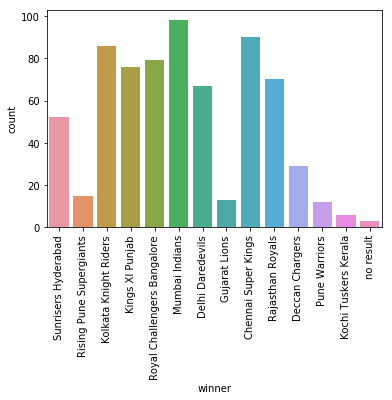

In [62]:
#Team that won the maximum number of matches
sns.countplot(x='winner', data=df_1)
mlt.xticks(rotation='vertical')
mlt.show()

From the graph above, Mumbai Indians have won the most number of matches followed by Chennai Super Kings and Kolkata Knight Rider

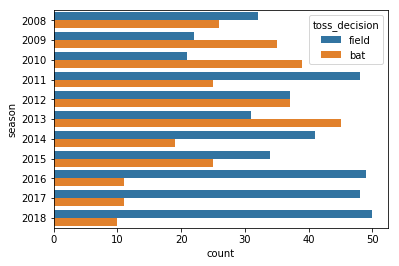

In [63]:
# Toss decisions analysis
sns.countplot(y='season',hue='toss_decision',data=df_1)
mlt.show()

Since 2014 season appears that more captains chose to field first after winning the toss

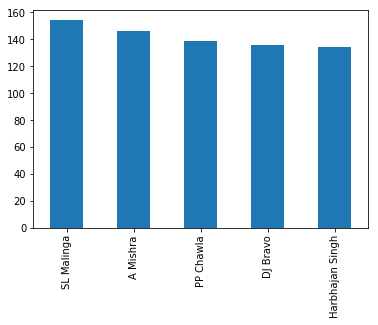

In [64]:
# Most number of wickets
dismissal_kinds = [1, 2, 3, 4, 5, 9] 
yo=df_2[df_2["dismissal_kind"].isin(dismissal_kinds)]
zz=yo['bowler'].value_counts()[:5].plot.bar()
for p in zz.patches:
    zz
mlt.show()

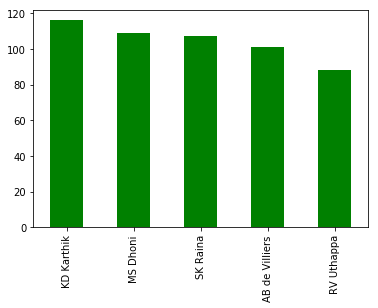

In [65]:
# Top 5 Fielders who ran out the batsman most
dismissal_kinds = [2,8] # 2 - caught, 8 - run out
y1=df_2[df_2["dismissal_kind"].isin(dismissal_kinds)]
yz=y1['fielder'].value_counts()[:5].plot.bar(color='g')
for p in yz.patches:
    yz
mlt.show()

If we consider number of catches taken and run outs effected as a criteria for 'Best Fielder' Dinesh Karthik stands first, followed by MS Dhoni and SK Raina

###### Data Transformation for Categorical variables as models can be applied only on numerical values for prediction

In [66]:
# replace team names with short codes as a first step before encoding
df_1.replace(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad'
],['CSK', 'DC', 'DD', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PW', 'RR', 'RPS', 'RCB', 'SRH'
],inplace=True)

# replace city names with short codes for further encoding
df_1.replace(['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bengaluru', 'Bloemfontein', 'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi', 'Dharamsala', 'Dubai', 'Durban', 'East London', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kochi', 'Kolkata', 'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam'],
             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], inplace=True)

In [67]:
encode = {'team1': {'CSK': 1, 'DC': 2, 'DD': 3, 'GL': 4, 'KXIP': 5, 'KTK': 6, 'KKR': 7, 'MI': 8, 'PW': 9, 'RR': 10, 'RPS': 11, 'RCB': 12, 'SRH': 13},
          'team2': {'CSK': 1, 'DC': 2, 'DD': 3, 'GL': 4, 'KXIP': 5, 'KTK': 6, 'KKR': 7, 'MI': 8, 'PW': 9, 'RR': 10, 'RPS': 11, 'RCB': 12, 'SRH': 13},
          'toss_winner': {'CSK': 1, 'DC': 2, 'DD': 3, 'GL': 4, 'KXIP': 5, 'KTK': 6, 'KKR': 7, 'MI': 8, 'PW': 9, 'RR': 10, 'RPS': 11, 'RCB': 12, 'SRH': 13},
          'winner': {'CSK': 1, 'DC': 2, 'DD': 3, 'GL': 4, 'KXIP': 5, 'KTK': 6, 'KKR': 7, 'MI': 8, 'PW': 9, 'RR': 10, 'RPS': 11, 'RCB': 12, 'SRH': 13, 'no result': 14},
          #'city': {'Abu Dhabi': 1, 'Ahmedabad': 2, 'Bangalore': 3, 'Bengaluru': 4, 'Bloemfontein': 5, 'Cape Town': 6, 'Centurion': 7, 'Chandigarh': 8, 'Chennai': 9, 'Cuttack': 10, 'Delhi': 11, 'Dharamsala': 12, 'Dubai': 13, 'Durban': 14, 'East London': 15, 'Hyderabad': 16, 'Indore': 17, 'Jaipur': 18, 'Johannesburg': 19, 'Kanpur': 20, 'Kimberley': 21, 'Kochi': 22, 'Kolkata': 23, 'Mohali': 24, 'Mumbai': 25, 'Nagpur': 26, 'Port Elizabeth': 27, 'Pune': 28, 'Raipur': 29, 'Rajkot': 30, 'Ranchi': 31, 'Sharjah': 32, 'Visakhapatnam': 33},
          'toss_decision': {'field': 0, 'bat': 1}
         }
df_1.replace(encode, inplace=True)
df_1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,16,05/04/2017,13,12,12,0,normal,0,13,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,28,06/04/2017,8,11,11,0,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,30,07/04/2017,4,7,7,0,normal,0,7,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,17,08/04/2017,11,5,5,0,normal,0,5,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,3,08/04/2017,12,3,12,1,normal,0,12,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


In [68]:
df_1.replace(['field', 'bat'],[0, 1], inplace=True)
# SELECTED COLUMNS TO FORM THE DATA FRAME FOR MODELING IN TO FEATURES AND TARGET LABELS
X = df_1[['team1','team2','city','toss_winner','toss_decision']]
y =df_1[['winner']]
X.head()
y.head()

,winner
0,13
1,11
2,7
3,5
4,12


In [69]:
# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 556 samples.
Testing set has 140 samples.


In [70]:
model = SVC(random_state = 7)
model.fit(X_train,y_train)
model.predict(X_test)

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 7,  8,  5,  7, 10, 13,  1, 10,  3,  1,  5,  5, 12,  7,  1,  5,  8,
       13, 12,  5, 13, 12,  7,  3,  9,  7,  5, 12,  1,  8, 13,  7,  8,  3,
        1,  8, 10,  8,  8,  3, 13,  5,  8,  1, 10,  5, 12, 12, 12,  1,  7,
        9,  8,  3,  1, 10,  1,  8, 13, 13, 12, 13,  1,  5,  7, 10,  7,  1,
       12,  5, 10,  3, 12,  1,  5,  8,  7,  3,  7,  1,  7,  1,  3,  8, 12,
        5,  5,  3,  1,  1, 12,  1,  5, 10,  8, 12, 12, 12,  1,  5,  8, 10,
       13,  1,  1,  8, 12, 12, 13,  8,  5,  7, 13,  8,  5,  8,  7,  5, 13,
        5,  1,  5, 10, 10,  7,  5,  7, 12, 10,  7,  8,  7,  1,  5,  5,  7,
        8,  8,  1, 12], dtype=int64)

In [71]:
#trying out the model on manufactured data with SVC model
predictions = pd.read_csv('Predict_Winner.csv')
pred = predictions [['team1','team2','city','toss_winner','toss_decision']]
pred
wins = model.predict(pred)
print(wins)

[ 8  1 10  1  1 10 10 10  7 10  1 12  5 12  8  5  8 10 10  1  1 10  5  7 10
  5  8  8 12 10  3  1 13 12 10 10  5  5 13 12 10  8  7 12 10  8 10 10  7  3
  1  8 13 10  5 10  7 12 12 12  5  1 13  7  8 12  8  8 10  7  7 12  1  3  1
  3  7 13  8]


In [89]:
#Multivariate Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train,y_train)
wins = model_1.predict(X_test)
print(wins.round())

[[  6.]
 [  8.]
 [  4.]
 [ 10.]
 [  5.]
 [  9.]
 [  7.]
 [  9.]
 [  1.]
 [  3.]
 [  4.]
 [  3.]
 [ 13.]
 [  9.]
 [  2.]
 [  6.]
 [ 10.]
 [ 12.]
 [  8.]
 [  7.]
 [ 13.]
 [ 11.]
 [  5.]
 [  5.]
 [  6.]
 [ 10.]
 [  7.]
 [  8.]
 [ 12.]
 [  8.]
 [ 12.]
 [ 10.]
 [  9.]
 [  7.]
 [  5.]
 [  8.]
 [  9.]
 [  8.]
 [  9.]
 [  6.]
 [ 12.]
 [  7.]
 [  5.]
 [  3.]
 [  6.]
 [  9.]
 [  7.]
 [  8.]
 [  7.]
 [  5.]
 [  5.]
 [  7.]
 [  6.]
 [  7.]
 [  6.]
 [  7.]
 [  2.]
 [  5.]
 [  8.]
 [ 10.]
 [  9.]
 [ 11.]
 [  6.]
 [  7.]
 [  6.]
 [  6.]
 [  6.]
 [  5.]
 [  9.]
 [  4.]
 [ 11.]
 [  4.]
 [ 11.]
 [  5.]
 [  8.]
 [  9.]
 [  5.]
 [  2.]
 [  5.]
 [  4.]
 [  4.]
 [  1.]
 [  3.]
 [ 10.]
 [  8.]
 [  7.]
 [  3.]
 [  5.]
 [  2.]
 [  1.]
 [ 13.]
 [  6.]
 [  4.]
 [  8.]
 [  8.]
 [  8.]
 [  8.]
 [  8.]
 [  3.]
 [  9.]
 [  4.]
 [  6.]
 [ 13.]
 [  6.]
 [  7.]
 [  7.]
 [  8.]
 [ 11.]
 [ 10.]
 [ 11.]
 [  9.]
 [  5.]
 [  8.]
 [  9.]
 [  7.]
 [  9.]
 [ 10.]
 [  4.]
 [ 12.]
 [  3.]
 [  2.]
 [  4.]
 [  6.]
 [ 10.]
 [  5.]


In [92]:
model_2 = AdaBoostClassifier(random_state = 7)
model_2.fit(X_train,y_train)
wins = model_2.predict(X_test)
wins
#print(wins.round())

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 8,  8,  8,  3,  1,  3,  1, 12,  8,  1,  8,  1, 12,  8,  1,  8, 12,
       13, 12,  8, 13,  8,  8,  8,  8, 12,  8, 12,  3,  8,  3, 12,  8,  8,
        8,  8,  8,  8,  8,  8,  3,  8,  8,  8,  8, 12,  8, 12, 12,  8,  8,
        8,  8, 12,  8,  8,  1,  8, 12, 12, 12, 12,  1,  8,  8,  8,  8,  8,
       12,  8, 12,  8, 12,  8,  8,  8,  8,  8,  8,  1,  1,  1,  8,  8, 12,
        8,  8,  8,  1,  1, 12,  8,  8,  8,  8, 12,  3, 12,  1, 12,  8,  1,
       13,  1,  1,  8, 12,  3,  3,  3,  3,  8, 12,  8,  8,  8,  3,  8,  3,
        8,  8,  8,  8, 12,  8,  8,  8,  8,  8,  8,  8,  8,  1,  8,  8,  8,
       12, 12,  1, 12], dtype=int64)

In [100]:
# model with Extreme Gradient Boosting algorithm
model_3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=7)
model_3.fit(X_train,y_train)
wins = model_3.predict(X_test)
wins
#print(wins.round())

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 7,  6,  5,  7,  1, 13,  1, 13,  2,  1,  5,  5, 13,  7,  1,  7, 11,
       13, 13, 10, 13, 12,  7,  3,  9, 13, 10, 12, 13,  8, 13,  7,  8, 10,
        1,  8, 10,  8,  8,  8, 13,  5,  8,  2,  1,  5, 12, 11, 12,  1,  7,
        9,  3, 11,  1, 10,  1,  8, 13, 13, 12, 13,  1,  5,  7,  3,  3,  1,
       13,  5, 10,  7, 12,  2,  5,  8,  7,  2,  7,  1,  7,  1,  3,  8, 11,
        8,  4,  4,  1,  1, 13,  1,  5, 10,  7, 12, 13,  1,  1,  5,  8,  1,
       13,  1,  1,  8, 12, 13, 13, 13, 13,  7, 12,  8,  8,  8,  7,  4, 13,
        5,  1,  5, 10,  8,  7,  5,  5, 10, 10,  8,  9,  1,  1,  3,  4,  8,
        8,  8,  1, 12], dtype=int64)

In [77]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    #sample_size = int(sample_size)
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5, average = 'macro')
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5, average = 'macro')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [81]:
# MODEL IMPLEMENTATION
clf_A = DecisionTreeClassifier(random_state = 8)
clf_B = SVC(random_state = 8)
clf_C = AdaBoostClassifier(random_state = 8)
#clf_C = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 4, random_state = 8)

samples_100 = int(round(len(X_train)))
samples_10 = int(round(len(X_train) / 10))
samples_1 = int(round(len(X_train) / 100))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier trained on 6 samples.
DecisionTreeClassifier trained on 56 samples.
DecisionTreeClassifier trained on 556 samples.
SVC trained on 6 samples.
SVC trained on 56 samples.
SVC trained on 556 samples.


C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\App-V\95FD7873-726E-40E9-

AdaBoostClassifier trained on 6 samples.
AdaBoostClassifier trained on 56 samples.
AdaBoostClassifier trained on 556 samples.


C:\ProgramData\App-V\95FD7873-726E-40E9-B477-CC4010411846\9727BF3A-F7F8-45A4-AD38-2F35B6E0FB2A\Root\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NameError: name 'accuracy' is not defined

In [ ]:
# VISUALIZE AND COMMUNICATE THE INSIGHTS